<div align="center" style='font-size: 21px; margin: 21px'><u><b>Классификация удовлетворённости пассажира</b><u></div>
 <div align="right" style='width: 333px; margin-left: auto; margin-bottom: 21px'><u><b>* Построение модели для классификации удовлетворённости пассажира </b><u></div>
        

<!-- <a id="ref3"></a> 
 -->
<div style="background-color: #BDDBF9; margin-top: 8px; padding: 22px; box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px;">
    <p style='font-size: 21px'>Содержание</p>
    <ol>
        <li><a style='' href="#ref1">Описание данных</a></li>
        <li><a style='' href="#ref2">Импорт данных и подготовка</a></li>
        <li><a style='' href="#ref3">Изучение данных</a></li>
        <li><a style='' href="#ref4">Очистка данных</a></li>
        <li><a style='' href="#ref5">Визуализация данных</a></li>
        <li><a style='' href="#ref7">Создание модели</a></li> 
        <li><a style='' href="#ref8">Заключение</a></li>
    </ol>
</div>

<a id="ref1"></a> 

Имеются данные об удовлетворенности клиентов авиакомпаний. Я построю модель прогнозирования удовлетворенности клиентов авиакомпании, предварительно обработаю данные и проведу оценку эффективности моделей. 

<!-- <b>Удовлетворенность</b> — это субъективная оценка потребителем степени удовлетворения желаний и требований, возникающих при приобретении или потреблении предоставленного продукта или услуги, а возможность повторного использования — это возможность того, что покупатель будет продолжать использовать продукт или услугу повторно после покупки. Чтобы доказать корреляцию между удовлетворенностью клиентов и намерением повторного использования, была продемонстрирована высокая корреляция между переменными путем проведения анализа корреляции между удовлетворенностью клиентов и намерением повторного использования для предприятий быстрого питания, предприятий по борьбе с вредителями, банков и прачечных за границей. Данные этого исследования представляют собой данные об удовлетворенности клиентов авиакомпаний, в том числе пол, возраст, питание и напитки на борту, удобство сидений и т. д. Они собираются Google Kaggle. Внедрение модели прогнозирования удовлетворенности клиентов авиакомпании и оценка эффективности выполняются с предварительной обработкой.

</p><b>Satisfaction</b> is a consumer's subjective evaluation of the extent to which desires and demands arising from
acquiring or consuming a provided product orservice are satisfied, and reusability isthe possibility that the customer
will continue to use the product or service repeatedly after purchasing. To prove the correlation between
customer satisfaction and reuse intention, a high correlation between variables is demonstrated by conducting a
correlation analysis between customer satisfaction and reuse intention for fast food businesses, pest control
businesses, banks, and laundry businesses overseas. 
<p>
    The data on this study are <b>Airline customer satisfaction data</b>, which are including gender, age, food and beverages
provided on board, seat comfort, etc. They are collected by <b>Google's Kaggle</b>.

Airline customer satisfaction prediction model implementation, and performance evaluation are conducted with pre-processing. -->

<a id="ref2"></a> 
### Импорт библиотек, функций

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,plot_confusion_matrix, plot_roc_curve,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
%matplotlib inline
import time
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
# from gitly.colab.plot import GitlyPlotter
# gitly = GitlyPlotter('github')
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
from sklearn import metrics

In [2]:
def show_missing(df):
    """Возвращает df - тип, количество, кол.уникальных, NaN и % NaN"""
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        pc_missing.append(round((df[item].isna().sum() / len(df[item])) * 100, 2))

    output = pd.DataFrame({
        'Колонка': variables, 
        'Тип значений': dtypes,
        'Количество значений': count,
        'Кол.уникальные значения': unique,
        'Кол.NaN': missing, 
        '% NaN': pc_missing
    })    
        
    return output

<br>

### Чтение и подготовка данных 

In [3]:
df = pd.read_csv("../f/Airline_Passenger_Satisfaction.csv", usecols=range(1,25))

In [4]:
pd.set_option('display.max_columns', None)
df.sample(4)

,ID,Пол,Возраст,Тип клиента,Тип путешествия,Класс,Дальность полёта,Задержка вылета,Задержка прибытия,Удобство времени вылета и прибытия,Простота онлайн бронирования,Услуга регистрации заезда,Онлайн-посадка,Расположение ворот,Обслуживание на борту,Комфорт сидения,Обслуживание в номерах для ног,Чистоплотность,Еда и напитки,Обслуживание понимаете,Услуга wi-fi в полёте,Развлечения на борту,Обработка багажа,Удовлетворённость
90014,90015,Мужчина,18,Первый раз,Бизнес,Эконом класс,983,0,0.0,4,4,3,4,3,4,5,4,5,5,4,4,5,5,Неудовлетворённый
53939,53940,Женщина,16,Возвращаемый,Личный,Эконом класс,2007,3,0.0,5,2,5,2,4,3,3,5,3,3,4,2,3,5,Удовлетворённый
51896,51897,Мужчина,54,Возвращаемый,Бизнес,Бизнес класс,507,0,0.0,1,1,2,5,1,4,4,5,2,5,4,1,4,4,Неудовлетворённый
73835,73836,Мужчина,39,Возвращаемый,Бизнес,Бизнес класс,1709,0,0.0,3,3,5,4,3,4,4,4,4,4,4,3,4,4,Неудовлетворённый


###  Преобразуем именно столбцов в формат camelCase

In [5]:
df.rename(columns = {'Пол': 'gender', 
                     'Возраст': 'age', 
                     'Тип клиента': 'customerType', 
                     'Тип путешествия': 'typeOfTravel', 
                     'Класс': 'class',
                     'Дальность полёта': 'flightDistance', 
                     'Задержка вылета': 'departureDelay', 
                     'Задержка прибытия': 'arrivalDelay',
                     'Удобство времени вылета и прибытия': 'departureAndArrivalTimeConvenience', 
                     'Простота онлайн бронирования': 'easeOfOnlineBooking',
                     'Услуга регистрации заезда': 'checkInService', 
                     'Онлайн-посадка': 'onlineBoarding', 
                     'Расположение ворот': 'gateLocation',
                     'Обслуживание на борту': 'onBoardService', 
                     'Комфорт сидения': 'seatComfort', 
                     'Обслуживание в номерах для ног': 'legRoomService', 
                     'Чистоплотность': 'cleanliness',
                     'Еда и напитки': 'foodAndDrink', 
                     'Обслуживание понимаете': 'inflightService', 
                     'Услуга wi-fi в полёте': 'inFlightWifiService',
                     'Развлечения на борту': 'inflightEntertainment',
                     'Обработка багажа': 'baggageHandling', 
                     'Удовлетворённость': 'satisfaction'}, inplace = True)


<br><a id="ref3"></a> 
### Изучение данных 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ID                                  129880 non-null  int64  
 1   gender                              129880 non-null  object 
 2   age                                 129880 non-null  int64  
 3   customerType                        129880 non-null  object 
 4   typeOfTravel                        129880 non-null  object 
 5   class                               129880 non-null  object 
 6   flightDistance                      129880 non-null  int64  
 7   departureDelay                      129880 non-null  int64  
 8   arrivalDelay                        129487 non-null  float64
 9   departureAndArrivalTimeConvenience  129880 non-null  int64  
 10  easeOfOnlineBooking                 129880 non-null  int64  
 11  checkInService            

In [7]:
df.dtypes

ID                                      int64
gender                                 object
age                                     int64
customerType                           object
typeOfTravel                           object
class                                  object
flightDistance                          int64
departureDelay                          int64
arrivalDelay                          float64
departureAndArrivalTimeConvenience      int64
easeOfOnlineBooking                     int64
checkInService                          int64
onlineBoarding                          int64
gateLocation                            int64
onBoardService                          int64
seatComfort                             int64
legRoomService                          int64
cleanliness                             int64
foodAndDrink                            int64
inflightService                         int64
inFlightWifiService                     int64
inflightEntertainment             

In [8]:
# Получим колонки, с которыми будем работать 
df.columns

Index(['ID', 'gender', 'age', 'customerType', 'typeOfTravel', 'class',
       'flightDistance', 'departureDelay', 'arrivalDelay',
       'departureAndArrivalTimeConvenience', 'easeOfOnlineBooking',
       'checkInService', 'onlineBoarding', 'gateLocation', 'onBoardService',
       'seatComfort', 'legRoomService', 'cleanliness', 'foodAndDrink',
       'inflightService', 'inFlightWifiService', 'inflightEntertainment',
       'baggageHandling', 'satisfaction'],
      dtype='object')

> краткий обзор, что содержит данные 

In [9]:
# Создаем df-обзор колонок
df_about = show_missing(df)

In [10]:
# Переворачиваем таблицу
df_about = df_about.transpose().rename(columns=df_about.transpose().iloc[0]).iloc[1:,:]

In [11]:
df_about

,ID,gender,age,customerType,typeOfTravel,class,flightDistance,departureDelay,arrivalDelay,departureAndArrivalTimeConvenience,easeOfOnlineBooking,checkInService,onlineBoarding,gateLocation,onBoardService,seatComfort,legRoomService,cleanliness,foodAndDrink,inflightService,inFlightWifiService,inflightEntertainment,baggageHandling,satisfaction
Тип значений,int64,object,int64,object,object,object,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,object
Количество значений,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880
Кол.уникальные значения,129880,2,75,2,2,3,3821,466,473,6,6,6,6,6,6,6,6,6,6,6,6,6,5,2
Кол.NaN,0,0,0,0,0,0,0,0,393,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
% NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Уникальные значения каждого столбца
df_about.iloc[[2]]

,ID,gender,age,customerType,typeOfTravel,class,flightDistance,departureDelay,arrivalDelay,departureAndArrivalTimeConvenience,easeOfOnlineBooking,checkInService,onlineBoarding,gateLocation,onBoardService,seatComfort,legRoomService,cleanliness,foodAndDrink,inflightService,inFlightWifiService,inflightEntertainment,baggageHandling,satisfaction
Кол.уникальные значения,129880,2,75,2,2,3,3821,466,473,6,6,6,6,6,6,6,6,6,6,6,6,6,5,2


In [13]:
print("Количество пассажиров:      ", df.shape[0])
print("Количество атрибутов таблици: ",df.shape[1])

Количество пассажиров:       129880
Количество атрибутов таблици:  24


<a id="ref4"></a> 
<br>
## Очистка данных 
Избавимся от 
* Дубликатов
* Нулевых значений

#### Заполнение пропусков столбца "Задержка прибытия" средним значением 

In [14]:
df.arrivalDelay = df.arrivalDelay.fillna(df.arrivalDelay.mean())

In [15]:
print('Количество нулевых значений :',df.isna().sum().sum())

Количество нулевых значений : 0


In [16]:
print('Количество дубликатов :',df.duplicated().sum())

Количество дубликатов : 0


##### Теперь наши данные готовы к изучению, визуализации и, наконец, к прогнозированию.

### Получим уникальные значения определённых столбцов 

In [17]:
list_unique = ['gender', 'customerType', 'class', 'satisfaction', 'typeOfTravel']
dict_unique = {}

In [18]:
print('УНИКАЛЬНЫЕ ЗНАЧЕНИЯ СТОЛБЦОВ:')
for (index, i) in enumerate(list_unique): 
    print(i, ' - ',  df[f'{i}'].unique())

УНИКАЛЬНЫЕ ЗНАЧЕНИЯ СТОЛБЦОВ:
gender  -  ['Мужчина' 'Женщина']
customerType  -  ['Первый раз' 'Возвращаемый']
class  -  ['Бизнес класс' 'Эконом класс' 'Эконом плюс']
satisfaction  -  ['Удовлетворённый' 'Неудовлетворённый']
typeOfTravel  -  ['Бизнес' 'Личный']


<br><a id="ref5"></a> 
### Визуализация данных

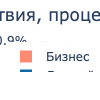

In [19]:
fig = px.pie(df, names = df['typeOfTravel'].value_counts().keys(),
                 values = df['typeOfTravel'].value_counts().values, width=100, height=100,
                 color_discrete_sequence=['#FE8A71', '#0E67A7', '#3DA4AB'])
fig.update_layout(
title='Тип путешествия, процент от общего',
title_x=0.5)
fig.show("png")

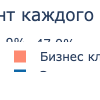

In [20]:
fig = px.pie(df, names = df['class'].value_counts().keys(),
                 values = df['class'].value_counts().values, width=100, height=100,
                 color_discrete_sequence=['#FE8A71', '#0E67A7', '#3DA4AB'])
fig.update_layout(
title='Процент каждого класса',
title_x=0.5)
fig.show("png")

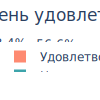

In [21]:
fig = px.pie(df, names = df['satisfaction'].value_counts().keys(),
                 values = df['satisfaction'].value_counts().values, width=100, height=100,
                 color_discrete_sequence=['#FE8A71', '#3DA4AB', '#0E67A7'])
fig.update_layout(
title='Общий уровень удовлетворённости',
title_x=0.5)
fig.show("svg")

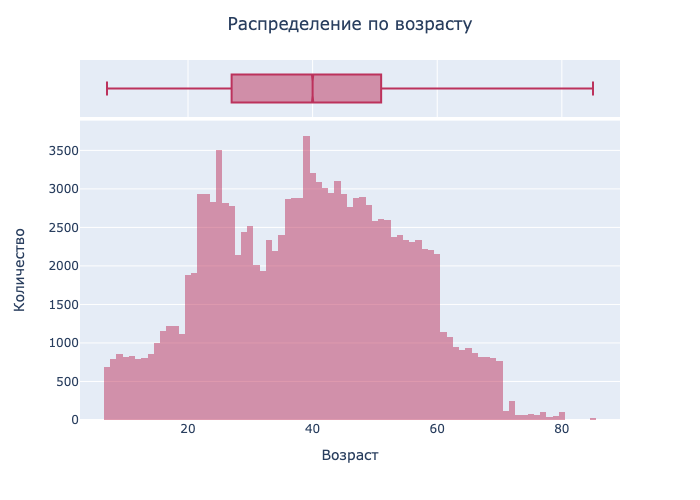

In [22]:
fig = px.histogram(df, x = 'age',  marginal ='box', barmode = 'overlay',
                 color_discrete_sequence=['#BC325C'])
fig.update_layout(
    title='Распределение по возрасту',
    xaxis_title="Возраст",
    yaxis_title="Количество",
    title_x=0.5
)
fig.show("png")

* Уровень удовлетворенности более 50%.
* По данным пассажиров, в классе путешествий преобладают бизнес-класс (48%) и эконом класс (45%), а остальные — эконом-плюс (7%).
* Возрастные выбросы не так значительны

In [24]:
list_plot = ['gender', 'customerType', 'class']

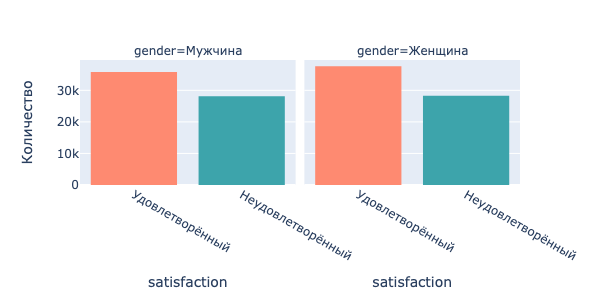

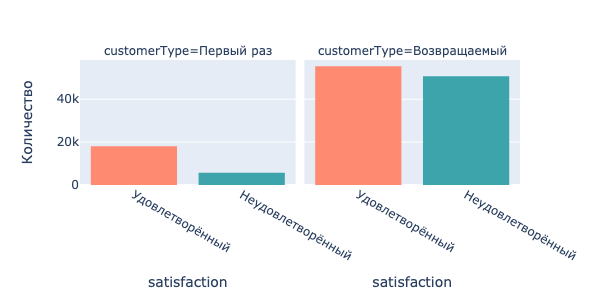

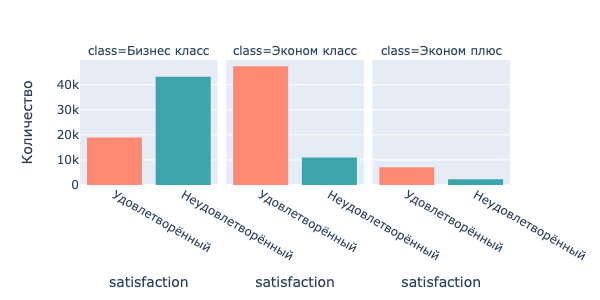

In [25]:
# import plotly.offline as pyo
import plotly.io as pio
pio.renderers.default = "notebook_connected"
for (index, elem) in enumerate(list_plot): 
    fig = px.histogram(data_frame = df
                       ,facet_col = f'{elem}'
                       ,x = 'satisfaction',
                       width=600, height=300
                    , color = 'satisfaction',
                 color_discrete_sequence=['#FE8A71', '#3DA4AB', '#0E67A7']
             )
    fig.update_layout(showlegend=False)
    fig.update_layout(
    yaxis_title="Количество",
    title_x=0.5
    )
    fig.show("png")

* Gender : Males and Females are almost the same with the satisfaction and dissatisfaction level so satisfaction behaviour is almost the same.
* Customer Type: Those who are returning are having almost the same level of people who are satisfied or Neutral or Dissatisfied and customers with first time are with most dissatisfied.
* Class : satisfaction level is more only for business class    

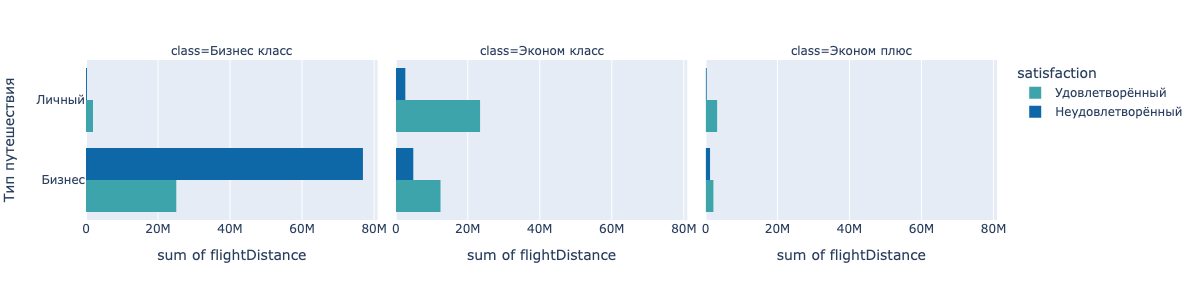

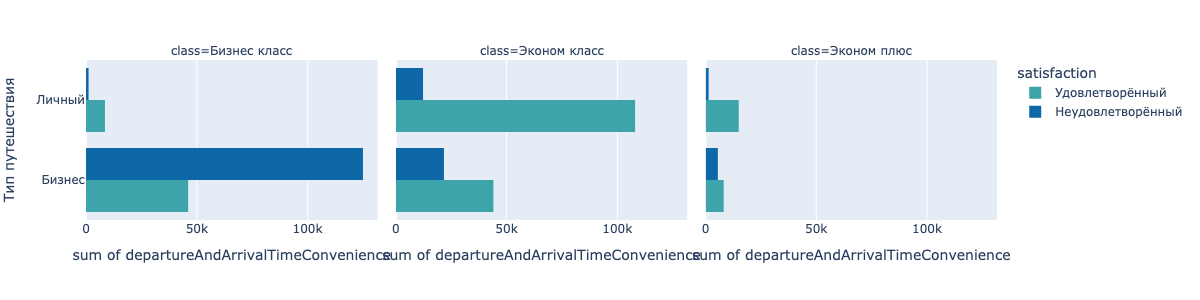

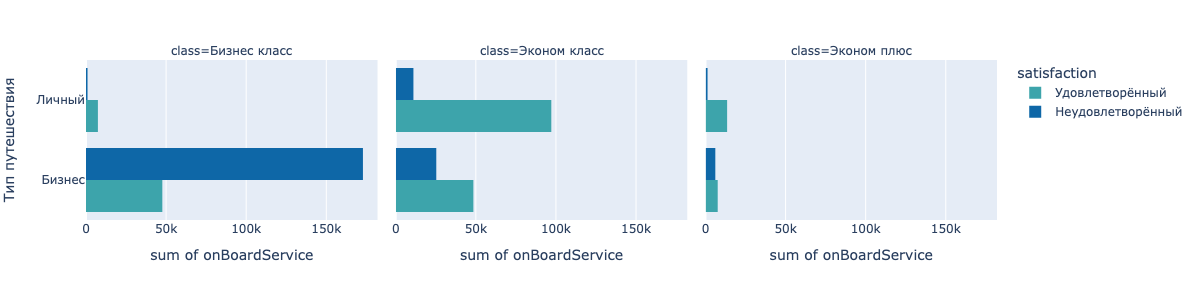

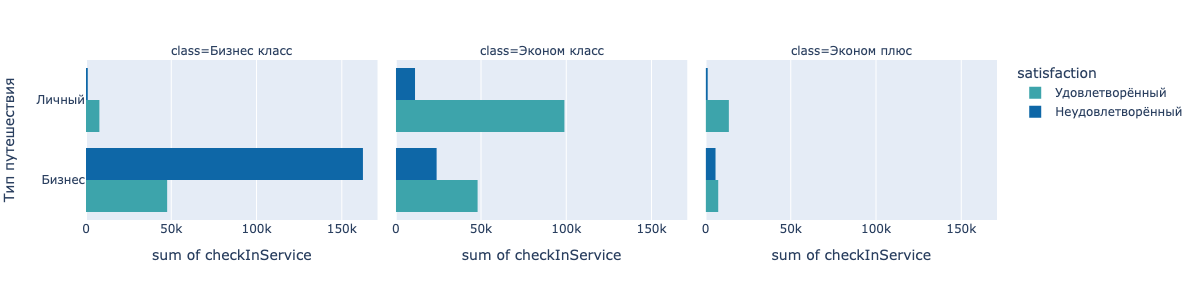

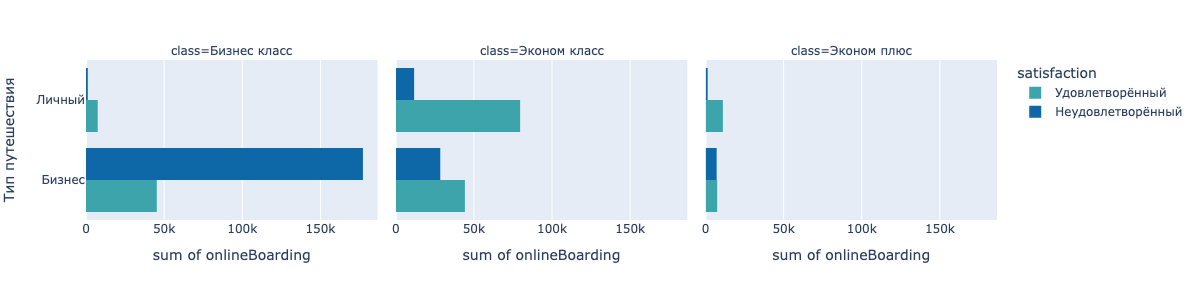

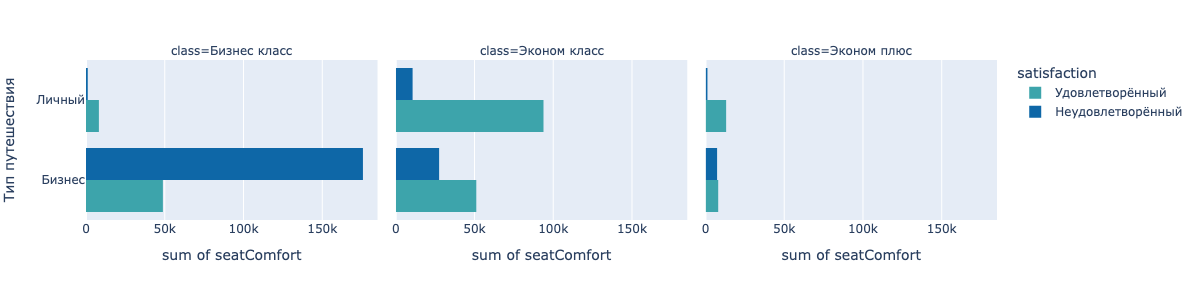

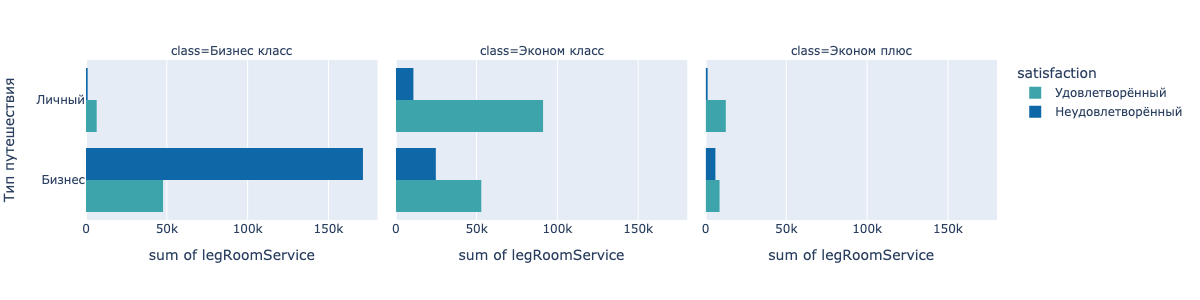

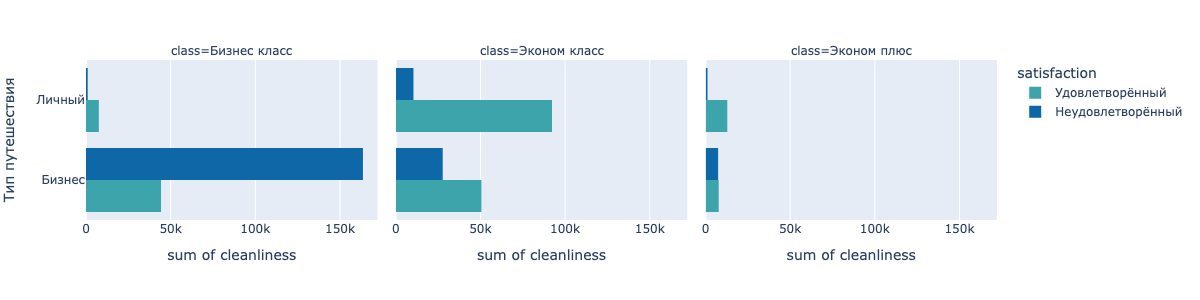

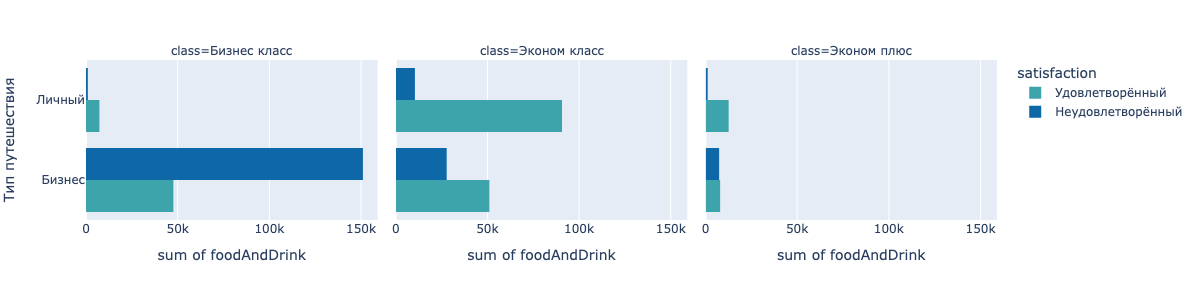

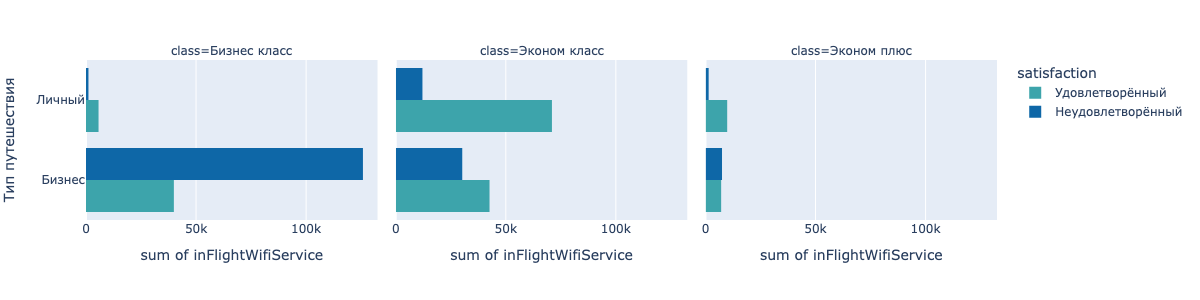

In [26]:
list_plot2 = ['flightDistance', 'departureAndArrivalTimeConvenience', 'onBoardService', 'checkInService', \
              'onlineBoarding', 'seatComfort', 'legRoomService', 'cleanliness', 'foodAndDrink', \
              'inFlightWifiService']

for (index, elem) in enumerate(list_plot2): 
    fig = px.histogram(data_frame = df
                       ,y = 'typeOfTravel', x = f'{elem}'
                       ,facet_col = 'class', barmode="group",
                       width=1200, height=300
                    , color = 'satisfaction',
                 color_discrete_sequence=['#3DA4AB', '#0E67A7', '#FE8A71']
             )
    fig.update_layout(
        yaxis_title="Тип путешествия",
        title_x=0.5
    )
    fig.show("png")

In [30]:
print(pd.pivot_table(data=df,values='age',index='gender',columns='class',aggfunc='count'))

class    Бизнес класс  Эконом класс  Эконом плюс
gender                                          
Женщина         31263         29670         4966
Мужчина         30897         28639         4445


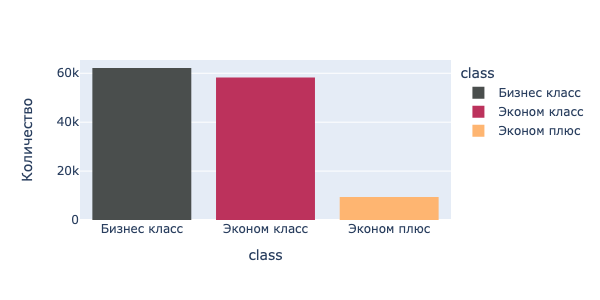

In [29]:
fig = px.histogram(df, x="class", color="class", width=600, height=300,
                   nbins=34, color_discrete_sequence=['#4A4E4D', '#BC325C', '#FEB571'])
fig.update_layout(
    yaxis_title="Количество",
    title_x=0.5
)
fig.show("png")

<u>Данные были исследованы, далее приступаем для обучения и создания модели для прогноза.<u>

#### Столбец с полом и номером ID клиента не имеют отношения к удовлетворенности, откажемся от этих столбцов для создания идеальной модели. 

In [30]:
df.satisfaction = df.satisfaction.replace({"Неудовлетворённый": 0, "Удовлетворённый": 1})
df['class'] = df['class'].replace({"Бизнес класс":2, "Эконом класс": 1, 'Эконом плюс': 0})
df.customerType = df.customerType.replace({'Первый раз': 0, 'Возвращаемый': 1}) 
df.typeOfTravel = df.typeOfTravel.replace({"Бизнес":0, "Личный": 1})

In [31]:
def age(agevalue):
    if agevalue < 40:
        return 1
    elif agevalue < 60:
        return 2
    else:
        return 3

In [32]:
df.age = df.age.apply(age)

- категориальные данные преобразованы, избавимся от ненужных столбцов 

In [33]:
df.drop(['gender',"ID"],axis=1, inplace=True)

In [34]:
df.sample(4)

,age,customerType,typeOfTravel,class,flightDistance,departureDelay,arrivalDelay,departureAndArrivalTimeConvenience,easeOfOnlineBooking,checkInService,onlineBoarding,gateLocation,onBoardService,seatComfort,legRoomService,cleanliness,foodAndDrink,inflightService,inFlightWifiService,inflightEntertainment,baggageHandling,satisfaction
112395,2,1,0,2,850,0,0.0,5,5,5,4,5,2,4,3,3,5,2,5,2,2,0
98960,1,0,0,1,479,22,20.0,1,3,4,3,3,2,3,1,3,3,3,2,3,3,1
20012,1,1,1,1,589,0,0.0,5,4,4,4,4,3,2,5,2,2,4,3,2,4,1
94792,2,1,0,2,192,0,0.0,2,2,2,4,2,4,4,4,2,4,4,3,4,3,1


#### Получим статистику и корреляцию данных 

In [35]:
df.describe()

,age,customerType,typeOfTravel,class,flightDistance,departureDelay,arrivalDelay,departureAndArrivalTimeConvenience,easeOfOnlineBooking,checkInService,onlineBoarding,gateLocation,onBoardService,seatComfort,legRoomService,cleanliness,foodAndDrink,inflightService,inFlightWifiService,inflightEntertainment,baggageHandling,satisfaction
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,1.600801,0.816908,0.309416,1.406136,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114,0.565537
std,0.654171,0.386743,0.462255,0.621378,997.452477,38.071126,38.407410,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025,0.495688
min,1.000000,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,1.000000
75%,2.000000,1.000000,1.000000,2.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,1.000000
max,3.000000,1.000000,1.000000,2.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [36]:
cor = df.corr(method = 'pearson')
cor = round(abs(cor.satisfaction), 2)
cor.sort_values(ascending=False)

satisfaction                          1.00
onlineBoarding                        0.50
typeOfTravel                          0.45
class                                 0.45
inflightEntertainment                 0.40
seatComfort                           0.35
onBoardService                        0.32
legRoomService                        0.31
cleanliness                           0.31
flightDistance                        0.30
inFlightWifiService                   0.28
baggageHandling                       0.25
inflightService                       0.24
checkInService                        0.24
foodAndDrink                          0.21
customerType                          0.19
easeOfOnlineBooking                   0.17
age                                   0.09
arrivalDelay                          0.06
departureAndArrivalTimeConvenience    0.05
departureDelay                        0.05
gateLocation                          0.00
Name: satisfaction, dtype: float64

#### Как мы видим, расположение ворот не имеет корреляции с удовлетворением пассажира

<a id="ref7"></a> 
### Создание модели прогноза

#### <u>Разделим набор данных<u>


In [37]:
X = df.drop(['satisfaction', "gateLocation"], axis=1)
y = df['satisfaction']

In [38]:
X.sample(3)

,age,customerType,typeOfTravel,class,flightDistance,departureDelay,arrivalDelay,departureAndArrivalTimeConvenience,easeOfOnlineBooking,checkInService,onlineBoarding,onBoardService,seatComfort,legRoomService,cleanliness,foodAndDrink,inflightService,inFlightWifiService,inflightEntertainment,baggageHandling
27234,2,1,0,2,2183,120,110.0,3,3,1,2,2,4,2,1,2,2,3,2,2
30802,2,1,0,2,3609,10,7.0,5,5,5,3,5,5,5,1,5,5,5,5,5
18511,3,1,0,2,383,7,0.0,3,3,1,4,2,3,2,4,4,2,2,2,2


In [39]:
y.sample(3)

33939     1
115471    1
73185     1
Name: satisfaction, dtype: int64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [41]:
print(f'''Размеры выборок 
обучающая X,y - {X_train.shape[0]} строк
тестовая X,y - {X_test.shape[0]} строк''')

Размеры выборок 
обучающая X,y - 97410 строк
тестовая X,y - 32470 строк


#### Обучим данные с помощью некоторых методов ML:
* Логистическая регрессия
* Метод k-ближайших соседей
* Алгоритм случайно в Одесса
* Дерево решений
* Наивный байесовский классификатор
* AdaBoost

#### Далее:
* Примерим модель
* Получим прогноз с помощью теста 
* Оценим точность 
* Матрица путаницы   
* ROC-кривая
* Время, затраченное каждый моделью


In [42]:
def cf_matrix_plot(y_test, X_test, model):
    y_pred = model.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v2}\n{v3}" for v2, v3 in
              zip(group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdYlBu')

    ax.set_title('Матрица путаницы\n\n');
    ax.set_xlabel('\nПредсказания')
    ax.set_ylabel('Фактические значения');
    ax.xaxis.set_ticklabels(['Ложь','Истина'])
    ax.yaxis.set_ticklabels(['Ложь','Истина'])
    return plt.show()

In [43]:
def roc_auc(model, y_test=y_test, X_test=X_test):
    lr_probs = model.predict(X_test)
    auc = roc_auc_score(y_test, lr_probs)
    print('LogisticRegression: ROC AUC=%.3f' % (auc))
    fpr, tpr, treshold = roc_curve(y_test, lr_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC кривая (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Пример ROC-кривой')
    plt.legend(loc="lower right")
    plt.show()

In [44]:
def model_create(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    intial_time=time.time()
    model.fit(X_train,y_train.ravel())
        
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("Точность прогноза = {}".format(accuracy))
    roc_auc = metrics. roc_auc_score (y_test, y_pred)
    print("AUC ROC - Площадь под кривой ошибок = {}".format(roc_auc))
    
    time_taken = time.time()-intial_time
    print("Затраченное время = {}".format(time_taken))
    
    print(classification_report(y_test,y_pred,digits=5))
    cf_matrix_plot(y_test, X_test, model) 
    
    fpr, tpr, treshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC кривая (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC-кривая {str(model)}')
    plt.legend(loc="lower right")
    plt.show()
    return model, accuracy, roc_auc, time_taken

In [45]:
df_class_accuracy = pd.DataFrame(columns=['Метод', 'Точность', 'ROC_AUC', 'Время'])

### <u>Логистическая регрессия :<u>

Точность прогноза = 0.801632275947028
AUC ROC - Площадь под кривой ошибок = 0.7998296467681514
Затраченное время = 0.7259840965270996
              precision    recall  f1-score   support

           0    0.76123   0.78673   0.77377     14001
           1    0.83411   0.81293   0.82338     18469

    accuracy                        0.80163     32470
   macro avg    0.79767   0.79983   0.79858     32470
weighted avg    0.80268   0.80163   0.80199     32470



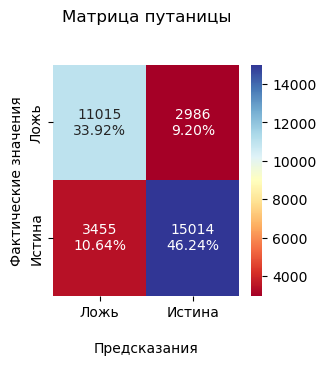

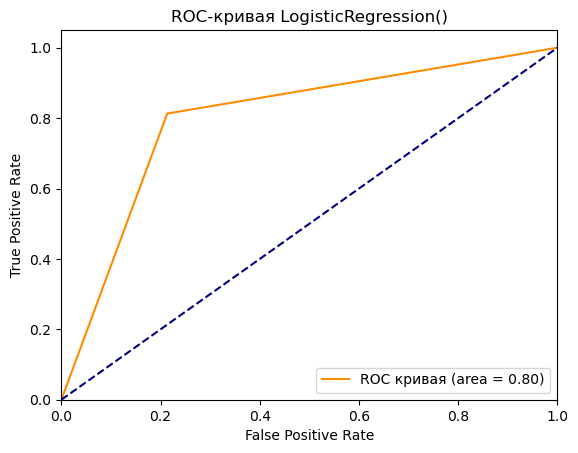

In [55]:
model_LR = LogisticRegression()
model_LR, accuracy_LR, roc_auc_LR, time_LR = model_create(model_LR)

In [56]:
df_class_accuracy.loc[len(df_class_accuracy)] = ['Logistic Regression', accuracy_LR, roc_auc_LR, time_LR]

### <u>Дерево решений:<u>

### <u>Случайный лес:<u>

Точность прогноза = 0.9607945796119495
AUC ROC - Площадь под кривой ошибок = 0.9580378955396582
Затраченное время = 9.583842754364014
              precision    recall  f1-score   support

           0    0.97008   0.93800   0.95377     14001
           1    0.95415   0.97807   0.96596     18469

    accuracy                        0.96079     32470
   macro avg    0.96212   0.95804   0.95987     32470
weighted avg    0.96102   0.96079   0.96071     32470



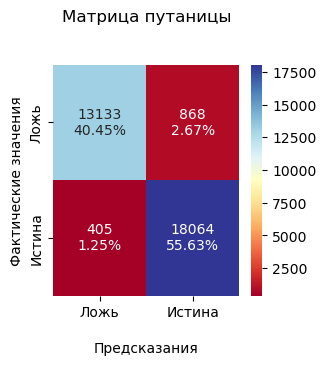

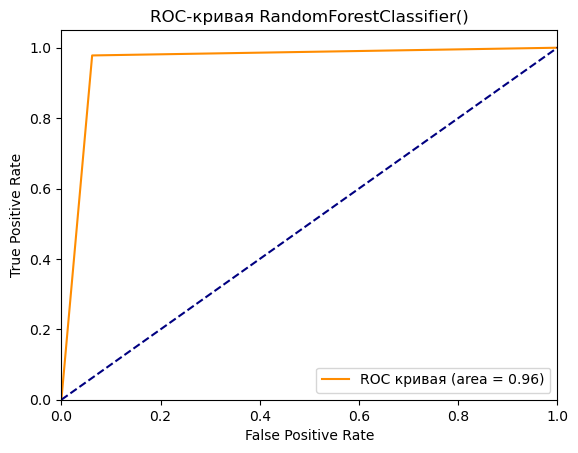

In [57]:
model_RF = RandomForestClassifier()
model_RF, accuracy_RF, roc_auc_RF, time_RF = model_create(model_RF)

In [58]:
df_class_accuracy.loc[len(df_class_accuracy)] = ['Random Forest', accuracy_RF, roc_auc_RF, time_RF]

### <u>Наивный байесовский классификатор:<u>

Точность прогноза = 0.8665537419156144
AUC ROC - Площадь под кривой ошибок = 0.8606822805742443
Затраченное время = 0.08627009391784668
              precision    recall  f1-score   support

           0    0.86516   0.81801   0.84093     14001
           1    0.86751   0.90335   0.88507     18469

    accuracy                        0.86655     32470
   macro avg    0.86634   0.86068   0.86300     32470
weighted avg    0.86650   0.86655   0.86604     32470



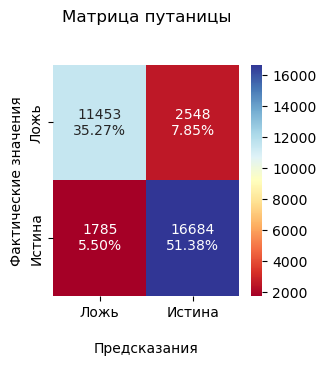

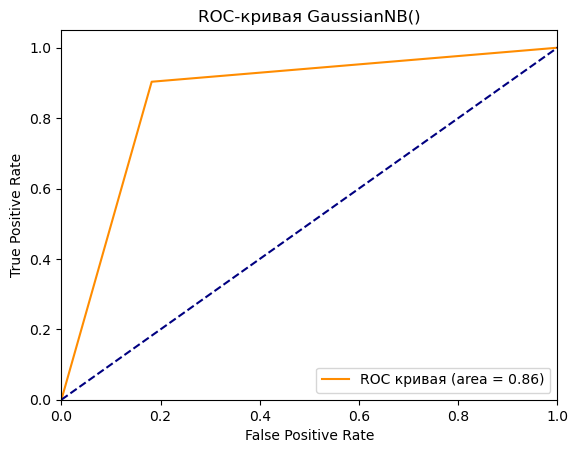

In [59]:
model_NB = GaussianNB() 
model_NB, accuracy_NB, roc_auc_NB, time_NB = model_create(model_NB)

In [60]:
df_class_accuracy.loc[len(df_class_accuracy)] = ['Naive Bayes Classifier', accuracy_NB, roc_auc_NB, time_NB]

### <u>K-ближайшие соседи :<u>

In [87]:
from sklearn.neighbors import KNeighborsClassifier 
# KNN = KNeighborsClassifier(n_neighbors=22) #I've tried more than 50 values. 22 is the best value

# KNN.fit(X_train,y_train)
# knn_score = KNN.score(X_test,y_test)
# # # score_list["KNN Classifier"] = knn_score
# # print(f"Score is {knn_score}")


In [80]:
model_KNN = a(n_neighbors=5)
model_KNN, accuracy_KNN, roc_auc_KNN, time_KNN = model_create(model_KNN)


AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
df_class_accuracy.loc[len(df_class_accuracy)] = ['K-Nearest Neighbors', accuracy_KNN, roc_auc_KNN, time_KNN]

### <u>Классификатор AdaBoost:<u>

Точность прогноза = 0.9276562981213428
AUC ROC - Площадь под кривой ошибок = 0.9251671665555444
Затраченное время = 3.2776172161102295
              precision    recall  f1-score   support

           0    0.92377   0.90708   0.91535     14001
           1    0.93051   0.94326   0.93684     18469

    accuracy                        0.92766     32470
   macro avg    0.92714   0.92517   0.92609     32470
weighted avg    0.92760   0.92766   0.92757     32470



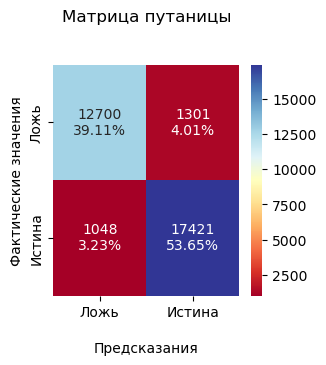

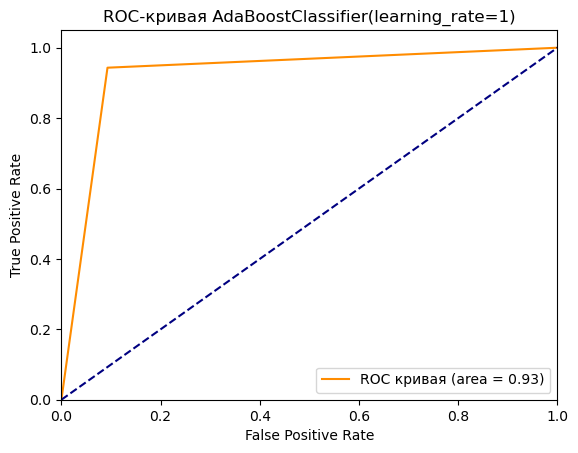

In [62]:
model_AB = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model_AB, accuracy_AB, roc_auc_AB, time_AB = model_create(model_AB)

In [64]:
df_class_accuracy.loc[len(df_class_accuracy)] = ['AdaBoostClassifier', accuracy_AB, roc_auc_AB, time_AB]

#### Сравнениv моделb 
- Мы собрали данные по каждой модели, ниже мы их сортируем и отобразим. Также оценим модели с точки зрения ROC_AUC и общего времени, затраченного на выполнение.

In [65]:
df_class_accuracy.sort_values(by=['Время'], ascending=False)

,Метод,Точность,ROC_AUC,Время
1,Random Forest,0.960795,0.958038,9.583843
3,AdaBoostClassifier,0.927656,0.925167,3.277617
4,AdaBoostClassifier,0.927656,0.925167,3.277617
0,Logistic Regression,0.801632,0.799830,0.725984
2,Naive Bayes Classifier,0.866554,0.860682,0.086270


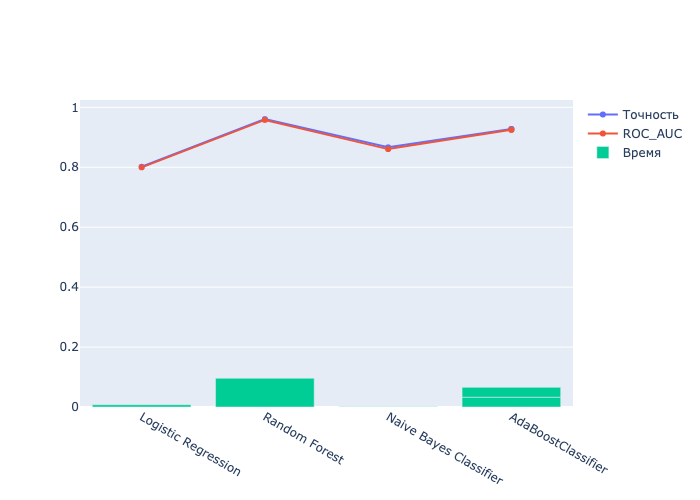

In [66]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_class_accuracy['Метод'],
        y=df_class_accuracy['Точность'],
        mode="lines+markers+text",
        name='Точность'
    ))
fig.add_trace(
    go.Scatter(
        x=df_class_accuracy['Метод'],
        y=df_class_accuracy['ROC_AUC'],
        mode="lines+markers+text",
        name='ROC_AUC'
    ))

fig.add_trace(
    go.Bar(
        x=df_class_accuracy['Метод'],
        y=df_class_accuracy['Время'] / 100,
        name='Время'
    ))              
fig.show("png")

### Заключение:
* Макимальная ROC-AUC для ** **, минимальная для ** ** 
* Затраченное время максимально для ** ** , минимально для  ** **
##### Для лучшего предсказания модели ищем 
* Максимальная ROC_AUC
* Минимальное время 
#### Сравнение **Случайного леса** является лучшей из моделей, обученных прогнозировать точный результат, с **точностью** **96%** и **временем** выполнения **8,95**.

Comparing **Random Forest** is the best from among the models trained to predict the accurate result with an **accuracy** of **96%** and **time taken** to execute is **8.95**